In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#connect to drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Model

In [ ]:
cnn = tf.keras.models.load_model("/content/F5.h5")

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Veg_recognition-ML/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


## Visualization and Performing Prediction on single Image

<function matplotlib.pyplot.show(close=None, block=None)>

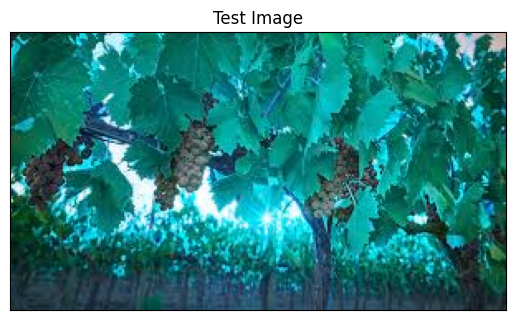

In [ ]:
import cv2 #library for working with images in Python
image_path = '/content/drive/MyDrive/Fruit_Veg_recognition-ML/train/grapes/images - 2024-05-30T224856.263.jfif'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting single image to batch
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 33ms/step


In [ ]:
print(prediction[0])
print(max(prediction[0]))

[9.7178081e-03 1.8194267e-03 1.4214766e-03 8.4912190e-03 9.0663094e-04
 1.3674328e-02 1.2092992e-02 6.7539775e-05 2.3493906e-02 2.3651536e-01
 1.0637833e-03 2.6228881e-04 1.1084374e-03 1.8038894e-03 1.9371022e-03
 7.5896800e-04 2.3594184e-02 7.9208100e-03 9.9551282e-04 8.5150907e-03
 1.9621879e-03 5.7551311e-03 1.0667488e-03 7.8130038e-03 1.6797613e-04
 5.0368223e-02 2.0908537e-04 2.0135647e-01 1.8867585e-03 1.1839111e-02
 8.2355030e-03 3.1685010e-01 2.3286657e-02 3.3161091e-04 3.5397426e-04
 1.2356760e-02]
0.3168501


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index)

(array([31]),)


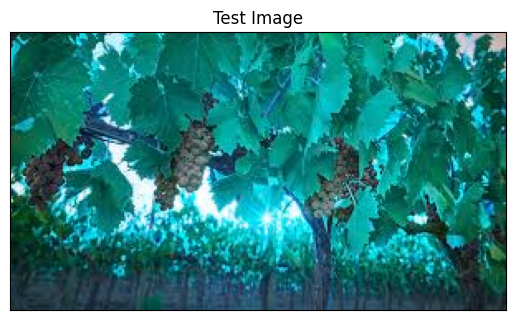

In [ ]:
#Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single Prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a sweetcorn
